<center><font color='orange'> 
# CITIBIKE DATA EXPLORATION
</font>
<img src='https://inhabitat.com/nyc/wp-content/blogs.dir/2/files/2013/04/citi-bike-share-1-e1366036215458.jpg', height=300, width=500></center>
<br>
Firstly Load the Data in the CitiBike Folder into a dataframe.

We will use two dataframes, one for 2014 and one for 2015. Later in the project, we;ll decide whether to merge these into one or to keep them separate. 

In [11]:
%%time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time 

CPU times: user 1.37 ms, sys: 563 µs, total: 1.93 ms
Wall time: 1.77 ms


In [12]:
%%time
citiBike2014_4 = pd.read_csv('Citi_Bike/2014-04 - Citi Bike trip data.csv')
citiBike2014_5 = pd.read_csv('Citi_Bike/2014-05 - Citi Bike trip data.csv')
citiBike2014_6 = pd.read_csv('Citi_Bike/2014-06 - Citi Bike trip data.csv')
citiBike2014_7 = pd.read_csv('Citi_Bike/2014-07 - Citi Bike trip data.csv')
citiBike2014_8 = pd.read_csv('Citi_Bike/2014-08 - Citi Bike trip data.csv')
citiBike2014_9 = pd.read_csv('Citi_Bike/201409-citibike-tripdata.csv')
citiBike2015_1 = pd.read_csv('Citi_Bike/201501-citibike-tripdata.csv')
citiBike2015_2 = pd.read_csv('Citi_Bike/201502-citibike-tripdata.csv')
citiBike2015_3 = pd.read_csv('Citi_Bike/201503-citibike-tripdata.csv')
citiBike2015_4 = pd.read_csv('Citi_Bike/201504-citibike-tripdata.csv')
citiBike2015_5 = pd.read_csv('Citi_Bike/201505-citibike-tripdata.csv')
citiBike2015_6 = pd.read_csv('Citi_Bike/201506-citibike-tripdata.csv')

CPU times: user 24 s, sys: 2.84 s, total: 26.9 s
Wall time: 28.7 s


Once the data has been loaded from different files, we will combine them into a single Dataframe using the <b>concat method.

In [13]:
%%time
citiBike_2014_list = [citiBike2014_4, citiBike2014_5, citiBike2014_6, citiBike2014_7, citiBike2014_8, citiBike2014_9]
citiBike_2015_list = [citiBike2015_1, citiBike2015_2, citiBike2015_3, citiBike2015_4, citiBike2015_5, citiBike2015_6]

citiBike_2014 = pd.concat(citiBike_2014_list)
citiBike_2015 = pd.concat(citiBike_2015_list)

CPU times: user 1.92 s, sys: 4.26 s, total: 6.17 s
Wall time: 8.16 s


We'll concatenate the two dataframes by adding the column Years to both of them. Then we'll change the format of the trip start and stop from object to datetime 

In [14]:
%%time
citiBike_2014['year'] = 2014
citiBike_2015['year'] = 2015

CPU times: user 87.2 ms, sys: 59.4 ms, total: 147 ms
Wall time: 258 ms


### INITIAL DATA EXPLORATION
Let's have a look at the data frame using the <B>head command</B> to get a feel of the dataset and the types of values. 

In [5]:
citiBike_2014.head(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,year
0,558,2014-04-01 00:00:07,2014-04-01 00:09:25,82,St James Pl & Pearl St,40.711174,-74.000165,2008,Little West St & 1 Pl,40.705693,-74.016777,21062,Subscriber,1982,1,2014
1,882,2014-04-01 00:00:20,2014-04-01 00:15:02,349,Rivington St & Ridge St,40.718502,-73.983299,312,Allen St & E Houston St,40.722055,-73.989111,20229,Subscriber,1988,1,2014
2,587,2014-04-01 00:00:25,2014-04-01 00:10:12,293,Lafayette St & E 8 St,40.730287,-73.990765,334,W 20 St & 7 Ave,40.742388,-73.997262,20922,Subscriber,1959,1,2014


Let's have a look at the table citiBike_2014 data by using the <B>describe command</B>. 

In [6]:
citiBike_2014.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,gender,year
count,5.359995e+06,5.359995e+06,5.359995e+06,5.359995e+06,5.359995e+06,5.359995e+06,5.359995e+06,5.359995e+06,5.359995e+06,5359995.0
mean,8.765660e+02,4.517112e+02,4.073435e+01,-7.399125e+01,4.513339e+02,4.073406e+01,-7.399136e+01,1.813856e+04,1.086643e+00,2014.0
std,2.908049e+03,3.731625e+02,1.949687e-02,1.233195e-02,3.745799e+02,1.951704e-02,1.240623e-02,2.096517e+03,5.651747e-01,0.0
min,6.000000e+01,7.200000e+01,4.068034e+01,-7.401713e+01,7.200000e+01,4.068034e+01,-7.401713e+01,1.452900e+04,0.000000e+00,2014.0
25%,4.070000e+02,3.050000e+02,4.072083e+01,-7.400026e+01,3.050000e+02,4.072066e+01,-7.400150e+01,1.633000e+04,1.000000e+00,2014.0
50%,6.510000e+02,4.040000e+02,4.073620e+01,-7.399093e+01,4.030000e+02,4.073535e+01,-7.399099e+01,1.813100e+04,1.000000e+00,2014.0
75%,1.076000e+03,4.890000e+02,4.074972e+01,-7.398205e+01,4.880000e+02,4.074916e+01,-7.398261e+01,1.993400e+04,1.000000e+00,2014.0
max,4.017450e+06,3.002000e+03,4.077152e+01,-7.395005e+01,3.002000e+03,4.077152e+01,-7.395005e+01,2.169000e+04,2.000000e+00,2014.0


In [15]:
%%time
citiBike_2014['starttime'] = pd.to_datetime(citiBike_2014['starttime'])
citiBike_2014['stoptime'] = pd.to_datetime(citiBike_2014['stoptime'])

CPU times: user 6min 59s, sys: 5.46 s, total: 7min 4s
Wall time: 7min 55s


In [16]:
%%time
citiBike_2015['starttime'] = pd.to_datetime(citiBike_2015['starttime'])
citiBike_2015['stoptime'] = pd.to_datetime(citiBike_2015['stoptime'])

CPU times: user 19min 46s, sys: 3.83 s, total: 19min 50s
Wall time: 1h 40min 28s


In [63]:
citiBike_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5359995 entries, 0 to 953886
Data columns (total 16 columns):
tripduration               int64
starttime                  object
stoptime                   object
start station id           int64
start station name         object
start station latitude     float64
start station longitude    float64
end station id             int64
end station name           object
end station latitude       float64
end station longitude      float64
bikeid                     int64
usertype                   object
birth year                 object
gender                     int64
year                       int64
dtypes: float64(4), int64(6), object(6)
memory usage: 695.2+ MB


In [17]:
%%time
citiBike_2014['startMonth'] = citiBike_2014['starttime'].apply(lambda x: x.month)
citiBike_2014['startDay'] = citiBike_2014['starttime'].apply(lambda x: x.dayofweek)
citiBike_2014['startDateDay'] = citiBike_2014['starttime'].apply(lambda x: x.day)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
citiBike_2014['startDay'] = citiBike_2014['startDay'].map(dmap)
citiBike_2014['startHour'] = citiBike_2014['starttime'].apply(lambda x: x.hour)


CPU times: user 1min 4s, sys: 2.47 s, total: 1min 6s
Wall time: 1min 7s


In [20]:
citiBike_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5359995 entries, 0 to 953886
Data columns (total 20 columns):
tripduration               int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start station id           int64
start station name         object
start station latitude     float64
start station longitude    float64
end station id             int64
end station name           object
end station latitude       float64
end station longitude      float64
bikeid                     int64
usertype                   object
birth year                 object
gender                     int64
year                       int64
startMonth                 int64
startDay                   object
startDateDay               int64
startHour                  int64
dtypes: datetime64[ns](2), float64(4), int64(9), object(5)
memory usage: 858.8+ MB


In [13]:
%%time
citiBike_2015['startMonth'] = citiBike_2015['starttime'].apply(lambda x: x.month)
citiBike_2015['startDay'] = citiBike_2015['starttime'].apply(lambda x: x.dayofweek)
citiBike_2015['startDateDay'] = citiBike_2015['starttime'].apply(lambda x: x.day)
citiBike_2015['startDay'] = citiBike_2015['startDay'].map(dmap)
citiBike_2015['startHour'] = citiBike_2015['starttime'].apply(lambda x: x.hour)
citiBike_2015['startDate'] = citiBike_2015['starttime'].apply(lambda x: x.hour)

### CitiBike Rides on Various Days of the Week

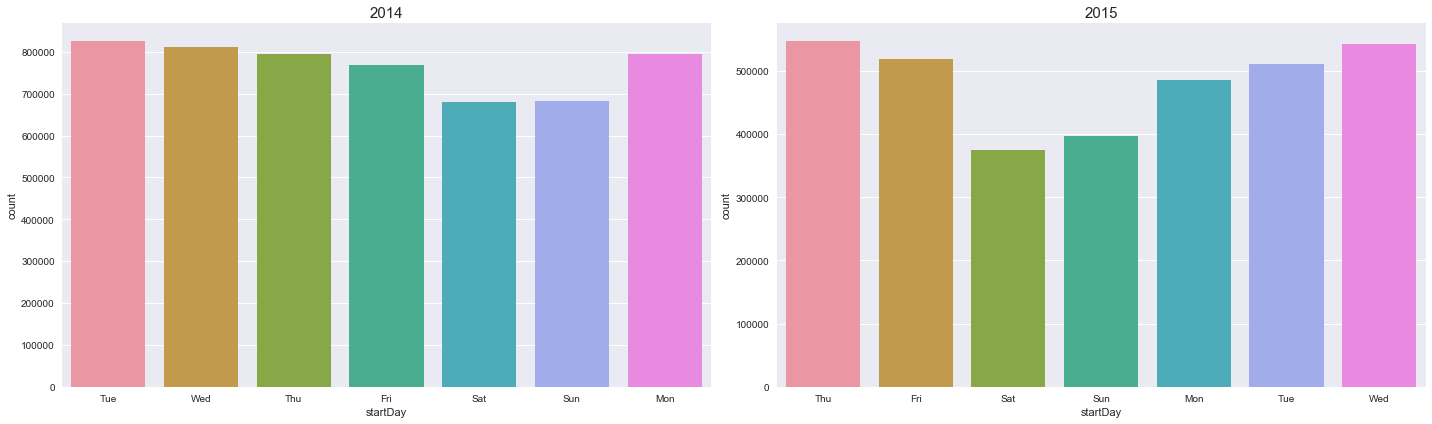

In [14]:
%%time
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.countplot(x='startDay', data=citiBike_2014)
plt.title('2014', fontsize=15)
plt.subplot(1, 2, 2)
sns.countplot(x='startDay', data=citiBike_2015)
plt.title('2015', fontsize=15)
plt.tight_layout()
plt.show()

From the above plot we can conclude that the demand for CitiBikes are usually higher on weekdays as compared to weekends, which are facing a dip in demand across both 2014 and 2015.Also, we are seeing a lesser number of total rides in 2015 as compared to 2014. This can probably be attributed to the winter months present in the data for 2015. But, we will explore the effect of months on rides later.  

### COMPARISON OF MONTH VS DAY OF WEEK

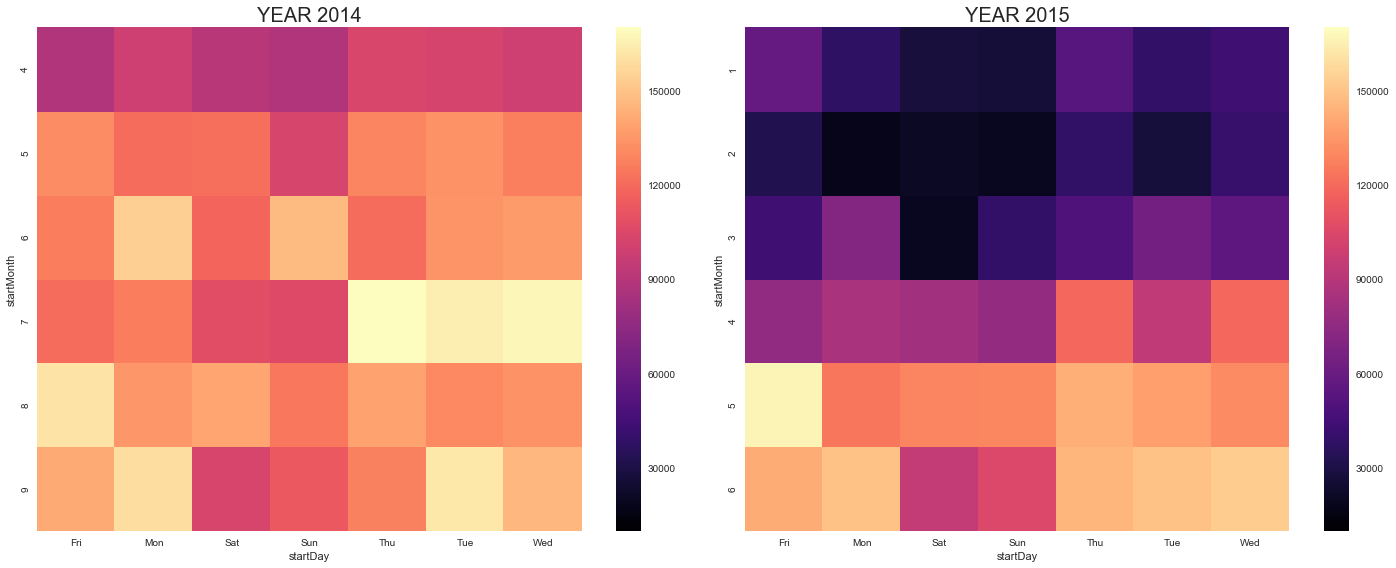

In [15]:
%%time
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
sns.heatmap(citiBike_2014.groupby(['startMonth','startDay']).count()['starttime'].unstack(), cmap='magma', label='2014', vmax=170000, vmin=10000)
plt.title('YEAR 2014', size=20)
plt.subplot(1, 2, 2)
sns.heatmap(citiBike_2015.groupby(['startMonth','startDay']).count()['starttime'].unstack(), cmap='magma', label='2015', vmax=170000, vmin=10000)
plt.tight_layout()
plt.title('YEAR 2015', size=20 )
plt.show()

The above heatmap is representing the trend of rides on CitiBike for given Month and Day of the week for 2014 & then 2015. 
<br>
The first we can notice is that there is decreaed ridership during the winter months of January, February, March which makes sense owing to the snowy conditions and low temperature in New York City during these months. Also, we see that the peaks of ridership are occuring in the summer months like May, June. 

From these indications we can assume that the weather is having a significant impact on the ridership. This also makes sense as the weather and temperature would have a greater impact on CitiBike as compared to Uber and NYC Taxi. In order to see the extent of the effect of weather, i'd like to import weather data and work with that.

### COMPARISON OF MONTH VS HOUR OF DAY

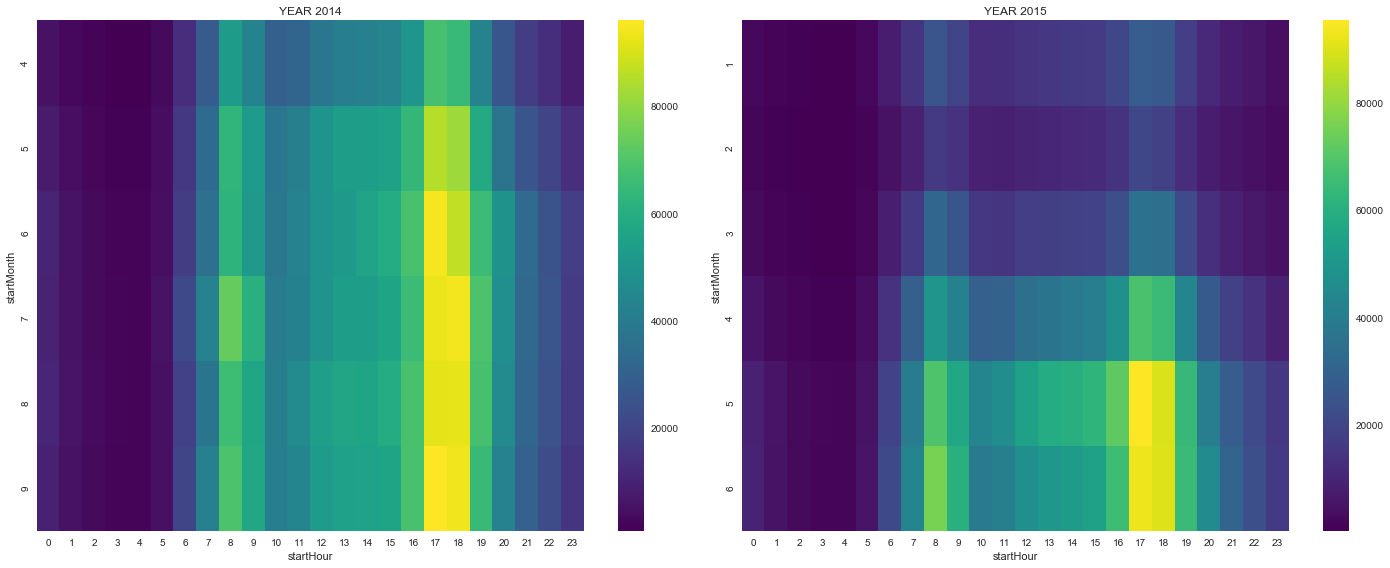

In [16]:
%%time
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
sns.heatmap(citiBike_2014.groupby(['startMonth','startHour']).count()['starttime'].unstack(), cmap='viridis', label='2014')
plt.title('YEAR 2014')
plt.subplot(1, 2, 2)
sns.heatmap(citiBike_2015.groupby(['startMonth','startHour']).count()['starttime'].unstack(), cmap='viridis', label='2015')
plt.tight_layout()
plt.title('YEAR 2015')
plt.show()


### TOTAL RIDES BY SUBSCRIBED VS ONE TIME USE CUSTOMERS FOR 2014 & 2015

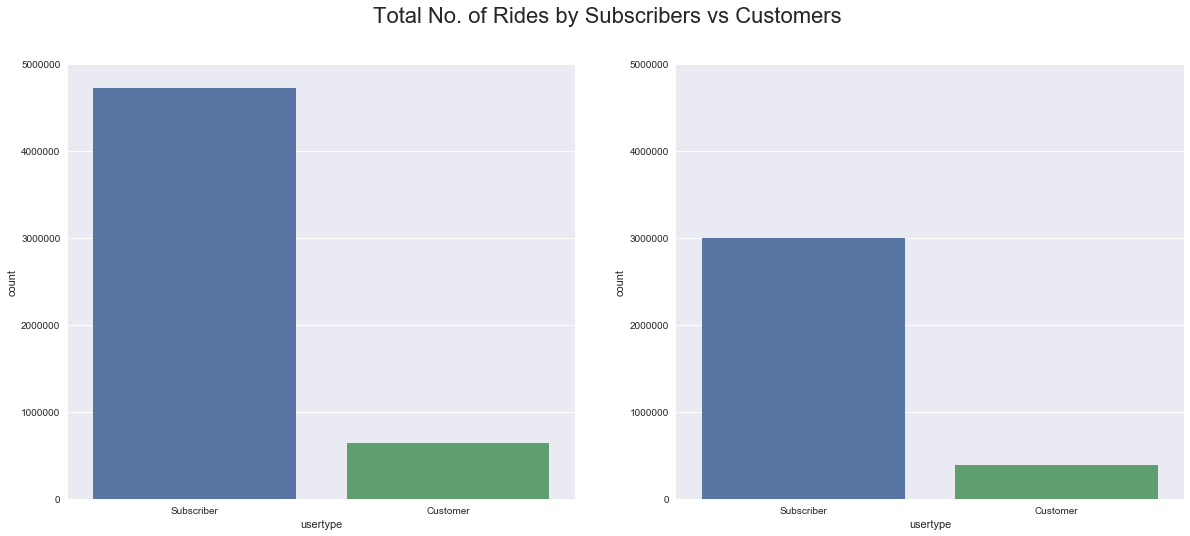

In [17]:
%%time
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
b = sns.countplot(x='usertype', data=citiBike_2014)
b.axes.set_ylim(0,5000000)
plt.subplot(1, 2, 2)
c = sns.countplot(x='usertype', data=citiBike_2015)
c.axes.set_ylim(0,5000000)
plt.suptitle('Total No. of Rides by Subscribers vs Customers', fontsize=22)

### Effect of Holidays on Type of Customer

Exploring the effect of holidays on the type of person taking a CitiBike, typically what I would think would be that on these days we should have a greater percentage of First Time/ One Time users as compared to an average day. 

There were <b>three federal holidays</b> in the time period we saw:
<ol>
<li>Memorial Day
<li>Independence Day
<li>Labor Day
</ol>
These three were taken into account.

Below, we explore this using two plots, the first is a countplot outlining the total number of trips on all the holidays with the total trips in 2014. The next is a pie plot showing the same figures for an average day in such a period and not the entire time period. 

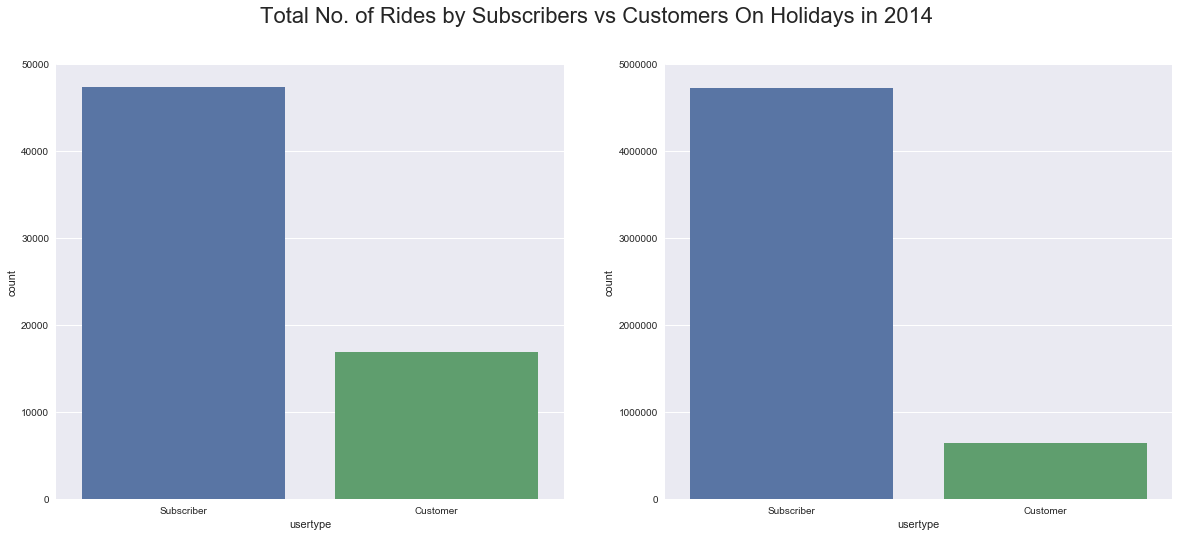

In [22]:
%%time
memorial_day = citiBike_2014[(citiBike_2014['startDateDay']==26)&(citiBike_2014['startMonth']==5)]
independence_day = citiBike_2014[(citiBike_2014['startDateDay']==4)&(citiBike_2014['startMonth']==7)]
labor_day = citiBike_2014[(citiBike_2014['startDateDay']==1)&(citiBike_2014['startMonth']==9)]
holidays_2014 = pd.concat([memorial_day,independence_day,labor_day])

plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
b = sns.countplot(x='usertype', data=holidays_2014)
b.axes.set_ylim(0,50000)
plt.subplot(1, 2, 2)
c = sns.countplot(x='usertype', data=citiBike_2014)
c.axes.set_ylim(0,5000000)
plt.suptitle('Total No. of Rides by Subscribers vs Customers On Holidays in 2014', fontsize=22 )


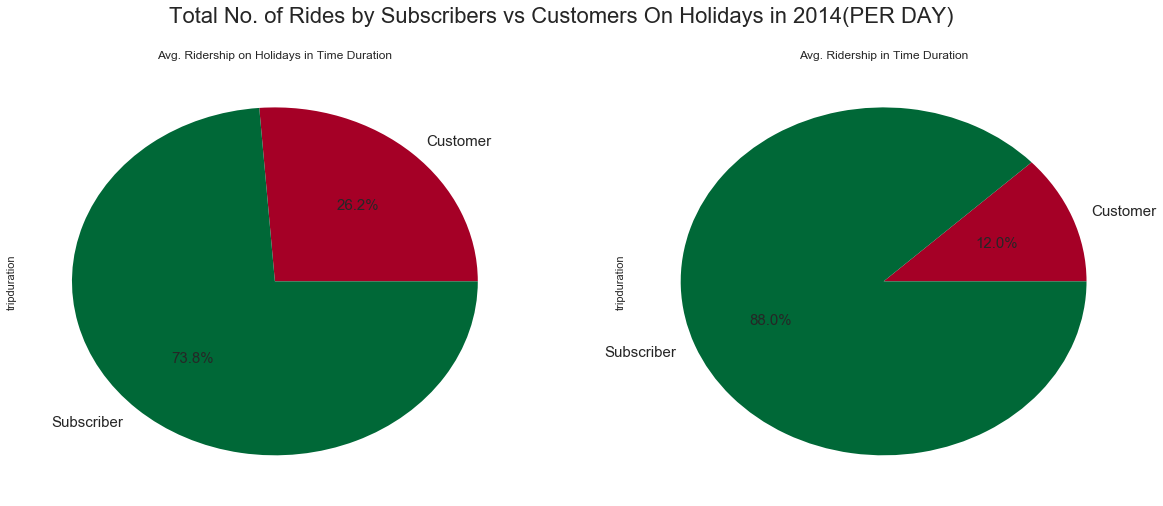

In [23]:
%%time
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
holidays_2014.groupby('usertype').count().apply(lambda x: x/3)['tripduration'].plot.pie(colormap='RdYlGn', autopct='%1.1f%%', fontsize=15)
plt.title('Avg. Ridership on Holidays in Time Duration')
plt.subplot(1, 2, 2)
citiBike_2014.groupby('usertype').count().apply(lambda x: x/183)['tripduration'].plot.pie(colormap='RdYlGn', autopct='%1.1f%%', fontsize=15)
plt.title('Avg. Ridership in Time Duration', )
plt.suptitle('Total No. of Rides by Subscribers vs Customers On Holidays in 2014(PER DAY)', fontsize=22)



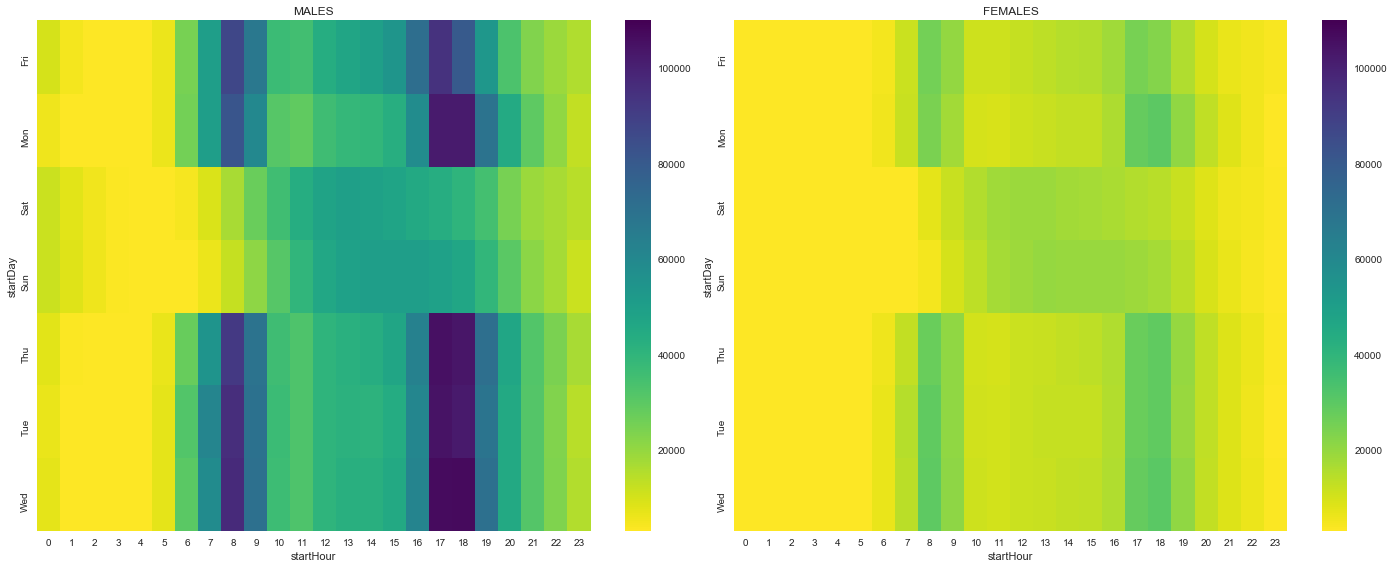

In [24]:
%%time
male_2014 = citiBike_2014[citiBike_2014['gender']==1]
female_2014 = citiBike_2014[citiBike_2014['gender']==2]
male_2015 = citiBike_2015[citiBike_2015['gender']==1]
female_2015 = citiBike_2015[citiBike_2015['gender']==2]
male = pd.concat([male_2014,male_2015])
female = pd.concat([female_2014,female_2015])

plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
sns.heatmap(male.groupby(['startDay','startHour']).count()['starttime'].unstack(), cmap='viridis_r', label='Males', vmax=110000, vmin=3000)
plt.title('MALES')
plt.subplot(1, 2, 2)
sns.heatmap(female.groupby(['startDay','startHour']).count()['starttime'].unstack(), cmap='viridis_r', label='Females', vmax=110000, vmin=3000)
plt.tight_layout()
plt.title('FEMALES')
plt.tight_layout()
plt.show()

 

### AVG. TRIP DURATION VS. TIME OF DAY & DAY OF WEEK

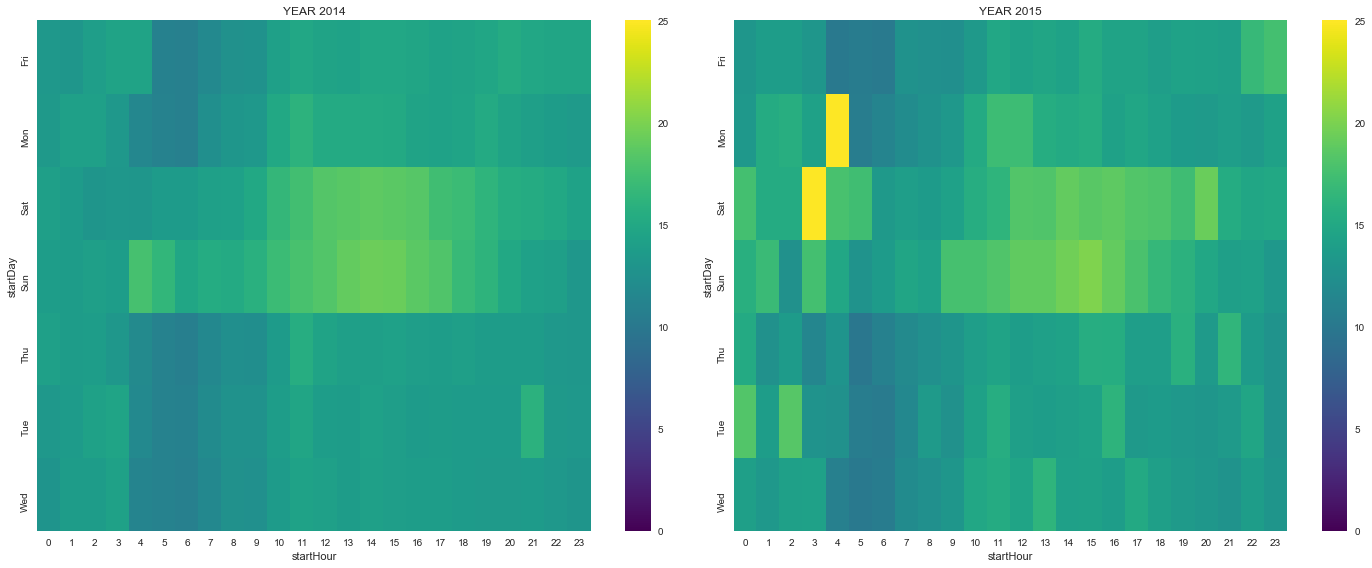

In [25]:
%%time
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
sns.heatmap(citiBike_2014.groupby(['startDay','startHour']).mean()['tripduration'].apply(lambda x: x/60).unstack(), cmap='viridis', label='2014', vmin=0, vmax=25)
plt.title('YEAR 2014')
plt.subplot(1, 2, 2)
sns.heatmap(citiBike_2015.groupby(['startDay','startHour']).mean()['tripduration'].apply(lambda x: x/60).unstack(), cmap='viridis', label='2015', vmin=0, vmax=25)
plt.tight_layout()
plt.title('YEAR 2015')
plt.show()

Trying to observe whether there is any trend within the time of day the trip was started, the day and the trip duration. However, I was unable to see any significant trend within the heatmap above. At most we can see that on <b>Saturday's</b> and <b>Sunday's</b> around <b>12 P.M.</b> till <b>5 P.M.</b> there is a marginal increase in the duration of the trip. This could be attributed to more traffic over the weekends in NYC.  

### VISUALIZING THE MOST UTILIZED STATIONS FOR STARTING TRIPS

In [318]:
import datetime
import math

citiBike_2014[citiBike_2014['usertype']=='Subscriber']
citi

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,gender,year,startMonth,startHour,startDateDay
count,4.716939e+06,4.716939e+06,4.716939e+06,4.716939e+06,4.716939e+06,4.716939e+06,4.716939e+06,4.716939e+06,4.716939e+06,4716939.0,4.716939e+06,4.716939e+06,4.716939e+06
mean,7.807950e+02,4.462299e+02,4.073461e+01,-7.399112e+01,4.447042e+02,4.073427e+01,-7.399126e+01,1.813526e+04,1.234765e+00,2014.0,6.656081e+00,1.401138e+01,1.587391e+01
std,2.585627e+03,3.586815e+02,1.912072e-02,1.212022e-02,3.573630e+02,1.910424e-02,1.218763e-02,2.094752e+03,4.243413e-01,0.0,1.660799e+00,4.940902e+00,8.742683e+00
min,6.000000e+01,7.200000e+01,4.068034e+01,-7.401713e+01,7.200000e+01,4.068034e+01,-7.401713e+01,1.452900e+04,0.000000e+00,2014.0,4.000000e+00,0.000000e+00,1.000000e+00
25%,3.880000e+02,3.050000e+02,4.072182e+01,-7.399995e+01,3.050000e+02,4.072182e+01,-7.400004e+01,1.632800e+04,1.000000e+00,2014.0,5.000000e+00,1.000000e+01,8.000000e+00
50%,6.050000e+02,4.040000e+02,4.073649e+01,-7.399076e+01,4.040000e+02,4.073588e+01,-7.399093e+01,1.812800e+04,1.000000e+00,2014.0,7.000000e+00,1.500000e+01,1.600000e+01
75%,9.650000e+02,4.890000e+02,4.074972e+01,-7.398258e+01,4.880000e+02,4.074901e+01,-7.398268e+01,1.992800e+04,1.000000e+00,2014.0,8.000000e+00,1.800000e+01,2.300000e+01
max,4.017450e+06,3.002000e+03,4.077152e+01,-7.395005e+01,3.002000e+03,4.077152e+01,-7.395005e+01,2.169000e+04,2.000000e+00,2014.0,9.000000e+00,2.300000e+01,3.100000e+01


In [40]:
weather_data = pd.read_csv('929752.csv')

In [41]:
weather_data.drop(['STATION','TAVG','WT01','WT02','WT03','WT04','WT05','WT06','WT08','WT09','WT10','WT11'], axis=1, inplace=True)

In [45]:
weather_data_NYC = weather_data.copy()
weather_data_NYC.head()

,STATION_NAME,DATE,PRCP,SNOW,TMAX,TMIN
0,WHITE PLAINS 3.1 NNW NY US,20140401,0.07,-9999.0,-9999,-9999
1,WHITE PLAINS 3.1 NNW NY US,20140402,0.00,0.0,-9999,-9999
2,WHITE PLAINS 3.1 NNW NY US,20140403,0.00,0.0,-9999,-9999
3,WHITE PLAINS 3.1 NNW NY US,20140406,0.00,0.0,-9999,-9999
4,WHITE PLAINS 3.1 NNW NY US,20140407,0.00,0.0,-9999,-9999


In [49]:
weather_data_NYC['DATE'] = weather_data_NYC['DATE'].apply(lambda x: str(x))

weather_data_NYC['YEAR'] = weather_data_NYC['DATE'].apply(lambda x: x[:4])
weather_data_NYC['MONTH'] = weather_data_NYC['DATE'].apply(lambda x: x[4:6])
weather_data_NYC['DAY'] = weather_data_NYC['DATE'].apply(lambda x: x[7:])

In [52]:
NYC_citi = weather_data_NYC[weather_data_NYC['STATION_NAME']=='NY CITY CENTRAL PARK NY US']

pd.merge(NYC_citi, , left_on='subject_id', right_on='subject_id')

,STATION_NAME,DATE,PRCP,SNOW,TMAX,TMIN,YEAR,MONTH,DAY
9700,NY CITY CENTRAL PARK NY US,20140401,0.00,0.0,60,39,2014,04,1
9701,NY CITY CENTRAL PARK NY US,20140402,0.00,0.0,54,42,2014,04,2
9702,NY CITY CENTRAL PARK NY US,20140403,0.07,0.0,67,46,2014,04,3
9703,NY CITY CENTRAL PARK NY US,20140404,0.21,0.0,47,40,2014,04,4
9704,NY CITY CENTRAL PARK NY US,20140405,0.00,0.0,54,40,2014,04,5
